In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier as DT


In [4]:
iris = datasets.load_iris()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

In [6]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [7]:
clf = DT()

In [8]:
parameters = {"max_depth":list(range(2,11)), "min_samples_leaf":[5,10,15,20,30]}

In [9]:
gcv = GridSearchCV(clf, parameters, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)

In [10]:
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [5, 10, 15, 20, 30]},
             return_train_score=True, scoring='roc_auc')

In [11]:
train_score = gcv.cv_results_["mean_train_score"]
test_score = gcv.cv_results_["mean_test_score"]

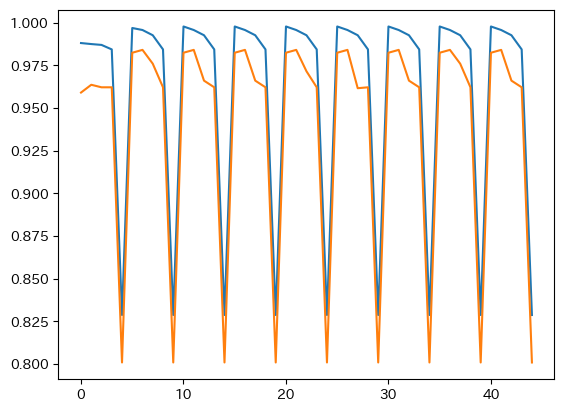

In [12]:
plt.plot(train_score)
plt.plot(test_score)

In [13]:
gcv.best_params_

{'max_depth': 3, 'min_samples_leaf': 10}

In [14]:
best_gcv = gcv.best_estimator_

In [15]:
print("score: {:.2%}".format(best_gcv.score(x_test, y_test)))

score: 92.11%


In [ ]:
#データの入力や分割方法を学習できた
#スコアの出し方はわかったが、これがどんな評価関数を用いているのか理解できていない